<a href="https://colab.research.google.com/github/Subhro23/testgitpush/blob/master/FSDS_AUG_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow
print(tensorflow.__version__)


2.12.0


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
df=pd.read_csv("/content/aps_data.csv")
df


<ipython-input-6-84496c8b645d>:1: DtypeWarning: Columns (81) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/aps_data.csv")


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,na,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,na,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,na,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,neg,31394,na,0,na,0,0,0,0,0,...,393008,207182,367634,267778,106778,48688,57146,638,0,0
4996,neg,1598,na,0,na,0,0,0,0,0,...,5298,3164,9710,47042,2296,1098,3288,272,0,0
4997,neg,42,2,2130706454,56,0,0,0,0,0,...,660,272,334,76,14,0,0,0,0,0
4998,neg,32752,na,0,na,0,0,0,0,0,...,533772,37122,56252,23188,1138,134,22,0,0,0


# New Section

In [7]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,na,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,na,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,na,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


In [8]:
df.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [9]:
df = df.replace("na",np.nan)

In [10]:
df.isnull().sum()

class        0
aa_000       0
ab_000    3849
ac_000     308
ad_000    1236
          ... 
ee_007      58
ee_008      58
ee_009      58
ef_000     242
eg_000     242
Length: 171, dtype: int64

In [11]:
df.isnull().sum().sum()

71649

In [12]:
df.isnull().sum()

class        0
aa_000       0
ab_000    3849
ac_000     308
ad_000    1236
          ... 
ee_007      58
ee_008      58
ee_009      58
ef_000     242
eg_000     242
Length: 171, dtype: int64

In [13]:
pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).rename(columns={0:"Null Value Count"})

,Null Value Count
br_000,4105
bq_000,4043
bp_000,3960
ab_000,3849
cr_000,3849
...,...
cj_000,38
ci_000,38
bt_000,12
aa_000,0


In [14]:
###filling null values in feature with median of the feature
for feature in[feature for feature in df.columns if feature not in ['class']]:
  df[feature] = df[feature].fillna(df[feature].median())

In [15]:
df.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [16]:
df.isnull().sum().sum()

0

In [17]:
pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).rename(columns={0:"Null Value Count"})

,Null Value Count
class,0
cs_003,0
cn_009,0
co_000,0
cp_000,0
...,...
ba_005,0
ba_006,0
ba_007,0
ba_008,0


In [18]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,0.0,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,0.0,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,0.0,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


In [19]:
x=df.drop("class",axis=1)

In [20]:
y=df["class"]

In [21]:
x.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 170 columns):
 #    Column  Non-Null Count  Dtype 
---   ------  --------------  ----- 
 0    aa_000  5000 non-null   int64 
 1    ab_000  5000 non-null   object
 2    ac_000  5000 non-null   object
 3    ad_000  5000 non-null   object
 4    ae_000  5000 non-null   object
 5    af_000  5000 non-null   object
 6    ag_000  5000 non-null   object
 7    ag_001  5000 non-null   object
 8    ag_002  5000 non-null   object
 9    ag_003  5000 non-null   object
 10   ag_004  5000 non-null   object
 11   ag_005  5000 non-null   object
 12   ag_006  5000 non-null   object
 13   ag_007  5000 non-null   object
 14   ag_008  5000 non-null   object
 15   ag_009  5000 non-null   object
 16   ah_000  5000 non-null   object
 17   ai_000  5000 non-null   object
 18   aj_000  5000 non-null   object
 19   ak_000  5000 non-null   object
 20   al_000  5000 non-null   object
 21   am_0    5000 non-null   object
 22 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 6.5+ MB


In [23]:
y

0       neg
1       neg
2       neg
3       neg
4       neg
       ... 
4995    neg
4996    neg
4997    neg
4998    neg
4999    neg
Name: class, Length: 5000, dtype: object

In [24]:
y=pd.get_dummies(y,drop_first=True)

In [130]:
###spliting the dateset into the training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [131]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 170)
(1000, 170)
(4000, 1)
(1000, 1)


In [132]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [133]:
###importing the keras libraries and its packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [134]:
classifier = Sequential()
classifier.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu',input_dim=170))
classifier.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [135]:
classifier.compile(optimizer='adam', loss = 'binary_crossentropy',metrics=["accuracy"])

In [136]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                1710      
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,831
Trainable params: 1,831
Non-trainable params: 0
_________________________________________________________________


In [137]:
model_history =classifier.fit(x_train,y_train,batch_size=10,epochs=20)

Epoch 1/20
400/400 [==============================] - 1s 1ms/step - loss: 0.1479 - accuracy: 0.9668
Epoch 2/20
400/400 [==============================] - 0s 1ms/step - loss: 0.0480 - accuracy: 0.9845
Epoch 3/20
400/400 [==============================] - 0s 1ms/step - loss: 0.0333 - accuracy: 0.9870
Epoch 4/20
400/400 [==============================] - 0s 1ms/step - loss: 0.0303 - accuracy: 0.9898
Epoch 5/20
400/400 [==============================] - 0s 1ms/step - loss: 0.0238 - accuracy: 0.9912
Epoch 6/20
400/400 [==============================] - 0s 1ms/step - loss: 0.0205 - accuracy: 0.9910
Epoch 7/20
400/400 [==============================] - 0s 1ms/step - loss: 0.0181 - accuracy: 0.9933
Epoch 8/20
400/400 [==============================] - 0s 1ms/step - loss: 0.0179 - accuracy: 0.9927
Epoch 9/20
400/400 [==============================] - 0s 1ms/step - loss: 0.0152 - accuracy: 0.9935
Epoch 10/20
400/400 [==============================] - 0s 1ms/step - loss: 0.0135 - accuracy: 0.9950

In [138]:
model_history =classifier.fit(x_train,y_train,batch_size=10,epochs=30,validation_split=0.25)

Epoch 1/30
300/300 [==============================] - 1s 2ms/step - loss: 0.0046 - accuracy: 0.9973 - val_loss: 0.0054 - val_accuracy: 0.9970
Epoch 2/30
300/300 [==============================] - 1s 2ms/step - loss: 0.0034 - accuracy: 0.9987 - val_loss: 0.0187 - val_accuracy: 0.9960
Epoch 3/30
300/300 [==============================] - 0s 1ms/step - loss: 0.0130 - accuracy: 0.9963 - val_loss: 0.0070 - val_accuracy: 0.9980
Epoch 4/30
300/300 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 0.9973 - val_loss: 0.0060 - val_accuracy: 0.9980
Epoch 5/30
300/300 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.9973 - val_loss: 0.0063 - val_accuracy: 0.9970
Epoch 6/30
300/300 [==============================] - 1s 2ms/step - loss: 0.0032 - accuracy: 0.9983 - val_loss: 0.0061 - val_accuracy: 0.9970
Epoch 7/30
300/300 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.0062 - val_accuracy: 0.9970
Epoch 

In [139]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [140]:
model_history.history["accuracy"]

[0.9973333477973938,
 0.9986666440963745,
 0.9963333606719971,
 0.9973333477973938,
 0.9973333477973938,
 0.9983333349227905,
 0.9993333220481873,
 0.999666690826416,
 0.999666690826416,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9990000128746033,
 0.9956666827201843,
 0.9986666440963745,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

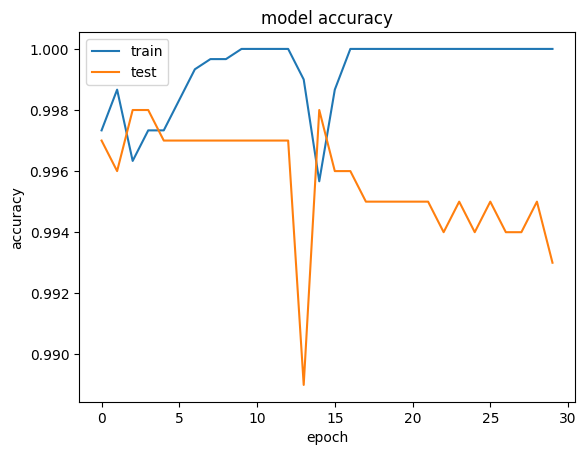

In [141]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc='upper left')
plt.show()


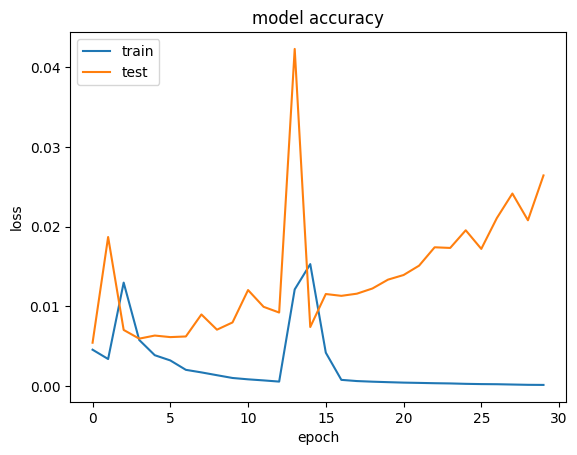

In [142]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("model accuracy")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","test"],loc='upper left')
plt.show()


In [143]:
y_pred=classifier.predict(x_test)

32/32 [==============================] - 0s 976us/step


In [144]:
y_pred=y_pred>0.05

In [145]:
from sklearn.metrics import confusion_matrix

In [146]:
confusion_matrix(y_test,y_pred)

array([[974,  12],
       [  3,  11]])

In [147]:
x_test.shape

(1000, 170)

In [148]:
y_pred.shape

(1000, 1)

In [ ]:
##hyperparameter tunning with keras tuner

In [149]:
!pip install  keras_tuner

In [150]:
from kerastuner.tuners import RandomSearch

In [151]:
def build_model(hp):
  model=Sequential()
  model.add(Dense(units=32,kernel_initializer = 'he_uniform',activation='relu',input_dim=170))
  model.add(Dense(units = 32, kernel_initializer = 'he_uniform',activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  optimizer=hp.Choice("optimizer",values=["adam","sgd","rmsprop","adadelta"])
  model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
  return model







In [152]:
tuner=RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='project1',project_name='aps-fault')

In [156]:
tuner.search(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Trial 4 Complete [00h 00m 02s]
val_accuracy: 0.9919999837875366

Best val_accuracy So Far: 0.9919999837875366
Total elapsed time: 00h 00m 09s


In [157]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

In [161]:
mymodel=tuner.get_best_models(num_models=1)[0]

In [163]:
mymodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                5472      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,561
Trainable params: 6,561
Non-trainable params: 0
_________________________________________________________________


In [164]:
for i in range( 2, 20):
  print(i)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [165]:
from tensorflow.keras import optimizers
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [166]:
tuner_second=RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='project3',project_name='aps-fault-sensor')

In [168]:
tuner_second.search(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Trial 5 Complete [00h 00m 06s]
val_accuracy: 0.9860000014305115

Best val_accuracy So Far: 0.9900000095367432
Total elapsed time: 00h 00m 39s


In [169]:
tuner_second.get_best_hyperparameters()[0].values

{'num_layers': 10,
 'units_0': 160,
 'units_1': 128,
 'learning_rate': 0.0001,
 'units_2': 64,
 'units_3': 448,
 'units_4': 32,
 'units_5': 32,
 'units_6': 32,
 'units_7': 32,
 'units_8': 32,
 'units_9': 32}

In [171]:
classifier2=tuner_second.get_best_models(num_models=1)[0]

In [172]:
classifier2.summary()

ValueError: ignored